<a href="https://colab.research.google.com/github/AmishaSontakke/Datacket-Intern-s-Tasks/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [ ]:
from google.colab import files
dataset = files.upload()

Saving PINS.csv to PINS.csv


In [ ]:
df = pd.read_csv('PINS.csv')
df

,Open,High,Low,Close,Volume
0,18.799999,19.100000,18.565001,18.799999,6334600
1,18.600000,18.709999,18.254999,18.360001,5203200
2,18.270000,19.350000,18.219999,18.910000,7978900
3,18.879999,19.420000,18.760000,19.260000,7471500
4,19.250000,19.980000,19.115000,19.719999,7363500
...,...,...,...,...,...
603,18.690001,18.750000,16.139999,17.250000,64287800
604,17.490000,19.049999,17.459999,18.900000,23261200
605,18.610001,19.900000,18.469999,19.540001,16484300
606,19.670000,20.549999,19.549999,20.450001,16632900


In [ ]:
df.shape

(608, 5)

In [ ]:
df = df['Open'].values
df = df.reshape(-1, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
14/14 [==============================] - 12s 176ms/step - loss: 0.0909
Epoch 2/50
14/14 [==============================] - 2s 173ms/step - loss: 0.0183
Epoch 3/50
14/14 [==============================] - 2s 171ms/step - loss: 0.0100
Epoch 4/50
14/14 [==============================] - 2s 174ms/step - loss: 0.0093
Epoch 5/50
14/14 [==============================] - 2s 174ms/step - loss: 0.0085
Epoch 6/50
14/14 [==============================] - 3s 180ms/step - loss: 0.0081
Epoch 7/50
14/14 [==============================] - 2s 170ms/step - loss: 0.0090
Epoch 8/50
14/14 [==============================] - 2s 172ms/step - loss: 0.0087
Epoch 9/50
14/14 [==============================] - 2s 171ms/step - loss: 0.0087
Epoch 10/50
14/14 [==============================] - 2s 169ms/step - loss: 0.0087
Epoch 11/50
14/14 [==============================] - 2s 170ms/step - loss: 0.0100
Epoch 12/50
14/14 [==============================] - 2s 172ms/step - loss: 0.0081
Epoch 13/50
14/14 [=====

In [ ]:
model = load_model('stock_prediction.h5')

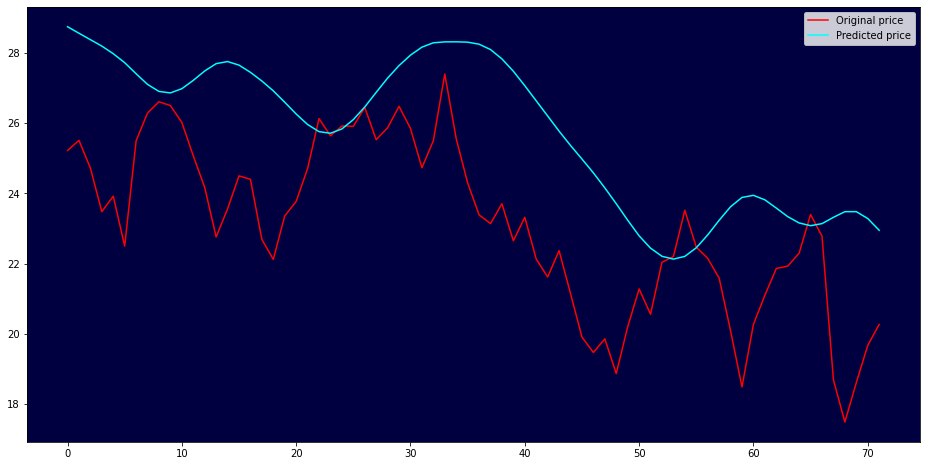

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()